# <font size="6">BC3409 Assignment on Credit Card Default</font> 
Cloud Deployment: 
https://bc3409-2022-assignment-linhui.herokuapp.com/

The purpose of this assignment is to predict the likelihood of credit card default for customers using 5 machine learning models, namely Logistic Regression, CART Model, Random Forest, XGBoost, and Neural Network MLP. 

The dataset contains information on 4 variables, including the income, age, loan as well as the outcome on whether the customer default or not.

# 1. Import the dataset using pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Credit Card Default II (balance).csv")

# 2. Exploratory data analysis
To better understand the data before building the models, I performed an exploratory data analysis (EDA) to detect any missing values, outliers and understand the correlation between the X variables.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,3428.0,45136.875975,14425.486619,20014.48947,32827.211177,45546.632873,57514.794130,69995.685580
age,3428.0,34.795950,12.840055,-52.42328,25.171939,30.086842,44.369461,63.971796
loan,3428.0,5591.986695,3174.522430,1.37763,3103.357467,5540.305046,7809.377943,13766.051240
default,3428.0,0.500000,0.500073,0.00000,0.000000,0.500000,1.000000,1.000000


## 2.1 Change the negative value from Age column to positive
Notice that there is negative values in "age" column.
I assume that they have accidentally key in the "-" sign
So, I changed the values of the “age” column to positive as it contained negative values which does not make sense.


In [4]:
df['age'] = abs(df['age'])

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,3428.0,45136.875975,14425.486619,20014.489470,32827.211177,45546.632873,57514.794130,69995.685580
age,3428.0,34.864292,12.653256,18.055189,25.187842,30.107024,44.387971,63.971796
loan,3428.0,5591.986695,3174.522430,1.377630,3103.357467,5540.305046,7809.377943,13766.051240
default,3428.0,0.500000,0.500073,0.000000,0.000000,0.500000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 4 columns):
income     3428 non-null float64
age        3428 non-null float64
loan       3428 non-null float64
default    3428 non-null int64
dtypes: float64(3), int64(1)
memory usage: 107.2 KB


## 2.2 Check if there is Na rows
I checked for any missing data, and none were found. 

In [7]:
df.isna().sum()

income     0
age        0
loan       0
default    0
dtype: int64

## 2.3 Change the data type to its necessary form.
Change Default column to string

In [8]:
data_types_dict = {'default': str}
df = df.astype(data_types_dict)
df.dtypes

income     float64
age        float64
loan       float64
default     object
dtype: object

## 2.4 Assign Value to X and Y 
where Y is the "default" and X is the rest of the independent variables

In [9]:
Y = df['default']
X = df.iloc[:,0:3]

## 2.5 Checking outliers for X variables
I checked for any outliers, and none were found. 

In [10]:
X.income.plot.box()

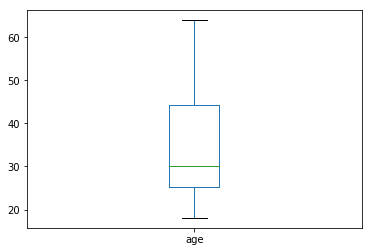

In [11]:
X.age.plot.box()

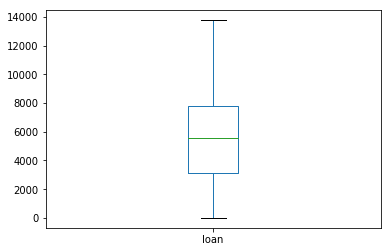

In [12]:
X.loan.plot.box()

## 2.6 Calculate VIF of X variables
Notice that the VIF for all X variables are greater than 5 which means the variables are correlated to each other and the VIF income more 10. This may cause multicollinearity problem.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

  feature        VIF
0  income  12.182478
1     age   5.139367
2    loan   6.212651


## 2.7 Heatmap for X variables
Checking the correlation bewteen X variables

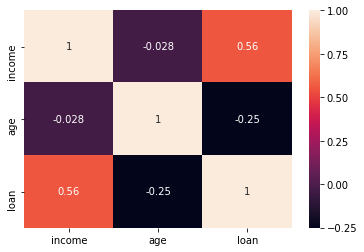

In [14]:
import seaborn as sns
sns.heatmap(df.corr(),annot = True)

# 3. Split train and test dataset
Split the data into a train (70%) and test (30%) sets where the random_state(set seed) is set to 10.

In [15]:
# random_state is set seed = 10
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

# 4. Linear Model - Logistic Regression
We assume:
1. Linear relationship between X and Y variables
2. Independence between X variables
3. Standard deviation of residuals is contant with mean equal to zero

## 4.1 Build Logistic Regression

In [16]:
from sklearn import linear_model
log_model = linear_model.LogisticRegression()
log_model.fit(x_train, y_train)
log_model_pred = log_model.predict(x_test)

## 4.2 Logistic Regression Accuracy and Confusion Matrix on Test Set

The accuracy of the model is: 84.65%


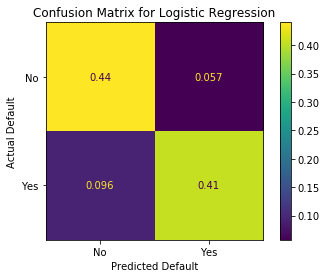

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
log_cm = confusion_matrix(y_test, log_model_pred, normalize='all')

cmd = ConfusionMatrixDisplay(log_cm, display_labels=['No','Yes'])
cmd.plot()
cmd.ax_.set(title='Confusion Matrix for Logistic Regression', 
            xlabel='Predicted Default', 
            ylabel='Actual Default')
accuracy = (log_cm[0,0]+log_cm[1,1])/sum(sum(log_cm))
precision = (log_cm[1,1])/(log_cm[1,1]+log_cm[0,1])
recall = (log_cm[1,1])/(log_cm[1,1]+log_cm[1,0])
result_df = pd.DataFrame({'Model':"Log Regression", 
                          "Accuracy": accuracy,
                          "Precision": precision, "Recall": recall},index=[0])

print("The accuracy of the model is: "+ str(round(accuracy*100,2))+ "%")

## 4.3 Export the model using joblib

In [18]:
import joblib
joblib.dump(log_model, "log_model")

['log_model']

# 5. CART Model

## 5.1 Create Validation Set
Validation sets are used to select and tune the final trained model

In [19]:
X_train1, X_validate, Y_train1, Y_validate = train_test_split(x_train, y_train, test_size=0.2,random_state=10)

## 5.2 Optimise parameters for CART using GridSearchCV
Tried to optimise max_depth and min_samples_split for CART model using GridSearchCV. 
Obtain the optimal value for this 2 parameters will try to prune the trees and avoid overfitting issues

In [20]:
from sklearn import tree
import math
from sklearn.model_selection import GridSearchCV

model = tree.DecisionTreeClassifier(random_state = 10)
grid = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(1, 20)]))
r= grid.fit(X_train1, Y_train1)
max_depth = r.best_params_['max_depth']

model = tree.DecisionTreeClassifier(max_depth= max_depth, random_state = 10)
grid = GridSearchCV(estimator = model, param_grid = dict( min_samples_split = [i for i in range(3, 20)]))
grid_results = grid.fit(X_train1, Y_train1)
min_split = grid_results.best_params_['min_samples_split']

## 5.3 Train model with optimal parameters

In [21]:
cart_model = tree.DecisionTreeClassifier(max_depth=max_depth,min_samples_split = min_split)
cart_model.fit(x_train, y_train)
cart_model_pred = cart_model.predict(x_test)

## 5.4 CART Accuracy and Confusion Matrix on Test Set

The accuracy of the model is: 98.64%


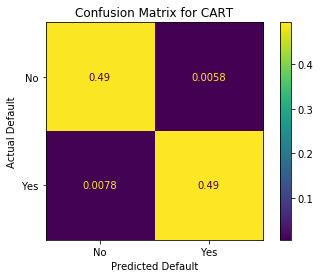

In [22]:
cart_cm = confusion_matrix(y_test, cart_model_pred,normalize='all')
cmd = ConfusionMatrixDisplay(cart_cm, display_labels=['No','Yes'])
cmd.plot()
cmd.ax_.set(title='Confusion Matrix for CART', 
            xlabel='Predicted Default', 
            ylabel='Actual Default')
accuracy = (cart_cm[0,0]+cart_cm[1,1])/sum(sum(cart_cm))
precision = (cart_cm[1,1])/(cart_cm[1,1]+cart_cm[0,1])
recall = (cart_cm[1,1])/(cart_cm[1,1]+cart_cm[1,0])
result_df1 = pd.DataFrame({'Model':"CART", "Accuracy": accuracy,"Precision": precision, "Recall": recall},index=[0])
print("The accuracy of the model is: "+ str(round(accuracy*100,2))+ "%")

## 5.5 Export the model using joblib

In [23]:
import joblib
joblib.dump(cart_model, "cart_model")

['cart_model']

# 6. Random Forest Model

## 6.1 Optimise parameters for Random Forest using GridSearchCV
Tried to optimise max_depth and min_samples_split for Random Forest model using GridSearchCV. 
Obtain the optimal value for this 2 parameters will try to prune the trees and avoid overfitting issues

In [24]:
import math
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 10)
grid = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(1, 20)]))
r= grid.fit(X_train1, Y_train1)
max_depth = r.best_params_['max_depth']

model = RandomForestRegressor(max_depth= max_depth, random_state = 10)
grid = GridSearchCV(estimator = model, param_grid = dict( min_samples_split = [i for i in range(3, 20)]))
grid_results = grid.fit(X_train1, Y_train1)
min_split = grid_results.best_params_['min_samples_split']

## 6.2 Train model with optimal parameters

In [25]:
rf_model = RandomForestRegressor(max_depth=max_depth,min_samples_split = min_split)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

## 6.3 Classify the predicted outcome based on a Threshold and predicted probability

In [26]:
rf_pred1 = []
threshold = 0.5
for i in rf_pred:
    if i > 0.5:
        a = "1"
    else:
        a = "0"
    rf_pred1.append(a)

## 6.4 Random Forest Accuracy and Confusion Matrix on Test Set

The accuracy of the model is: 99.22%


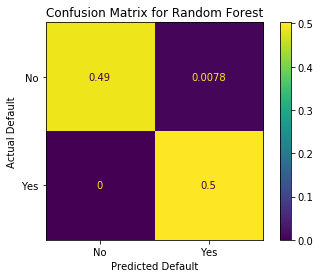

In [27]:
rf_cm = confusion_matrix(y_test, rf_pred1,normalize = 'all')
cmd = ConfusionMatrixDisplay(rf_cm, display_labels=['No','Yes'])
cmd.plot()
cmd.ax_.set(title='Confusion Matrix for Random Forest', 
            xlabel='Predicted Default', 
            ylabel='Actual Default')
accuracy = (rf_cm[0,0]+rf_cm[1,1])/sum(sum(rf_cm))
precision = (rf_cm[1,1])/(rf_cm[1,1]+rf_cm[0,1])
recall = (rf_cm[1,1])/(rf_cm[1,1]+rf_cm[1,0])
result_df2 = pd.DataFrame({'Model':"Random Forest", "Accuracy": accuracy,"Precision": precision, "Recall": recall},index=[0])
print("The accuracy of the model is: "+ str(round(accuracy*100,2))+ "%")

## 6.5 Export the model using joblib

In [28]:
import joblib
joblib.dump(rf_model, "rf_model")

['rf_model']

# 7. XGBoost

## 7.1 Optimise parameters for XGBoost using GridSearchCV
Tried to optimise max_depth and min_samples_split for XGBoost model using GridSearchCV. 
Obtain the optimal value for this 2 parameters will try to prune the trees and avoid overfitting issues

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
import math
from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor(random_state = 10)
grid = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(1, 20)]))
r= grid.fit(X_train1, Y_train1)
max_depth = r.best_params_['max_depth']

model = GradientBoostingRegressor(max_depth= max_depth, random_state = 10)
grid = GridSearchCV(estimator = model, param_grid = dict( min_samples_split = [i for i in range(3, 20)]))
grid_results = grid.fit(X_train1, Y_train1)
min_split = grid_results.best_params_['min_samples_split']

## 7.2 Train model with optimal parameters

In [30]:
XGB_model = GradientBoostingRegressor(max_depth=max_depth, min_samples_split = min_split)
XGB_model.fit(x_train, y_train)
XGB_pred = XGB_model.predict(x_test)

## 7.3 Classify the predicted outcome based on a Threshold and predicted probability

In [31]:
XGB_pred1 = []
threshold = 0.5
for i in XGB_pred:
    if i > threshold:
        a = "1"
    else:
        a = "0"
    XGB_pred1.append(a)

## 7.4 XGBoost Accuracy and Confusion Matrix on Test Set

The accuracy of the model is: 99.03%


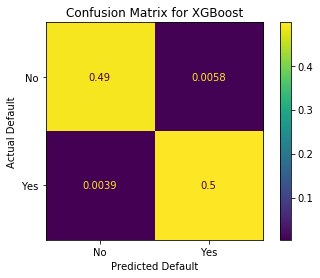

In [32]:
xgb_cm = confusion_matrix(y_test, XGB_pred1,normalize = 'all')
cmd = ConfusionMatrixDisplay(xgb_cm, display_labels=['No','Yes'])
cmd.plot()
cmd.ax_.set(title='Confusion Matrix for XGBoost', 
            xlabel='Predicted Default', 
            ylabel='Actual Default')
accuracy = (xgb_cm[0,0]+xgb_cm[1,1])/sum(sum(xgb_cm))
precision = (xgb_cm[1,1])/(xgb_cm[1,1]+xgb_cm[0,1])
recall = (xgb_cm[1,1])/(xgb_cm[1,1]+xgb_cm[1,0])
result_df3 = pd.DataFrame({'Model':"XGBoost", "Accuracy": accuracy,"Precision": precision, "Recall": recall},index=[0])
print("The accuracy of the model is: "+ str(round(accuracy*100,2))+ "%")

## 7.5 Export the model using joblib

In [33]:
import joblib
joblib.dump(XGB_model, "XGB_model")

['XGB_model']

# 8 Neural Network MLP

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

## 8.1 Normalisation of data
Normalizing the data generally help to speeds up learning and leads to faster convergence for neural network models

In [35]:
X['Norm_income'] = (X['income'] - min(X['income']))/(max(X['income'])-min(X['income']))
X['Norm_age'] = (X['age'] - min(X['age']))/(max(X['age'])-min(X['age']))
X['Norm_loan'] = (X['loan'] - min(X['loan']))/(max(X['loan'])-min(X['loan']))

norm_X = X.loc[:,['Norm_income','Norm_age','Norm_loan']]

## 8.2 Train-Test split based on the normalize X
Split the data into a train (70%) and test (30%) sets where the random_state(set seed) is set to 10.

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(norm_X, Y, test_size=0.3, random_state=10)

## 8.3 Find the best parameter for MLP 
Tried to find the best hidden_layer_sizes and activation function for MLP model using GridSearchCV. 

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

model = MLPClassifier(solver = "lbfgs", random_state=10,max_iter = 500)
parameter_space = {
    'hidden_layer_sizes': [(50,50), (25,25), (50)],
    'activation': ['tanh', 'relu']
}
grid = GridSearchCV(estimator = model, param_grid = parameter_space)
r= grid.fit(x_train, y_train)
r.best_params_

{'activation': 'tanh', 'hidden_layer_sizes': (25, 25)}

## 8.4 Train the MLP Model with train set

In [38]:
MLP_model = MLPClassifier(solver = "lbfgs", 
                          hidden_layer_sizes = r.best_params_['hidden_layer_sizes'], 
                          activation = r.best_params_['activation'],
                          random_state=10)
MLP_model.fit(x_train, y_train)
MLP_pred = MLP_model.predict(x_test)

## 8.5 MLP Accuracy and Confusion Matrix on Test Set

The accuracy of the model is: 99.81%


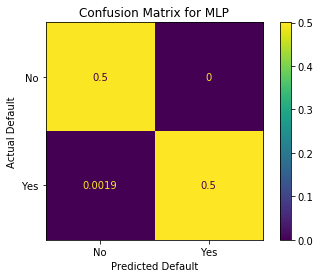

In [39]:
mlp_cm = confusion_matrix(y_test, MLP_pred, normalize = 'all')
cmd = ConfusionMatrixDisplay(mlp_cm, display_labels=['No','Yes'])
cmd.plot()
cmd.ax_.set(title='Confusion Matrix for MLP', 
            xlabel='Predicted Default', 
            ylabel='Actual Default')
accuracy = (mlp_cm[0,0]+mlp_cm[1,1])/sum(sum(mlp_cm))
precision = (mlp_cm[1,1])/(mlp_cm[1,1]+mlp_cm[0,1])
recall = (mlp_cm[1,1])/(mlp_cm[1,1]+mlp_cm[1,0])
result_df4 = pd.DataFrame({'Model':"MLP", "Accuracy": accuracy,"Precision": precision, "Recall": recall},index=[0])
print("The accuracy of the model is: "+ str(round(accuracy*100,2))+ "%")

## 8.6 Export the model using joblib

In [40]:
import joblib
joblib.dump(MLP_model, "MLP_model")

['MLP_model']

# 9. Conclusion
Below is a Chart showing the different measurement for different models in descending order based on accuracy score.

## 9.1 Analysis of Models
The nature of a credit card default analysis would require a model with high recall. Recall is a good measure to use when the cost of False Negative is high. In this case, there is high cost associated with the bank if a default credit card is predicted as non-default. Thus, we will focus on having a model with the highest recall score as compared to precision and accuracy.

Out of the 5 models, Random Forest the highest recall score of 100% and second highest accuracy score of 99.41%. This means that the model is able to minimize False Negative predictions, helping the company to minimize risks and losses arising from credit card defaults.

Although MLP has the highest accuracy score of 99.81%, it has a lower recall score of 99.61% than Random Forest. Furthermore, MLP is a “black box” which means it is harder to gain insights from the X and Y variables. On the other hand, it is easier to gain insights of the X and Y variables from the other 4 models (through the coefficients of X in Regression and variable importance in Decision Tree models).

In short, based on the dataset given, I would recommend Random Forest to predict the credit card defaults of customers due to its high recall and ability to generate useful insights from the input variables.


,Model,Accuracy,Precision,Recall
4,MLP,0.998056,1.000000,0.996132
2,Random Forest,0.992225,0.984762,1.000000
3,XGBoost,0.990282,0.988439,0.992263
1,CART,0.986395,0.988350,0.984526
0,Log Regression,0.846453,0.876310,0.808511


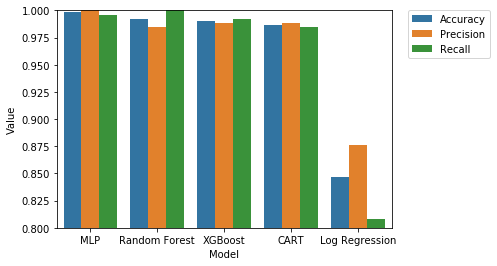

In [41]:
results = result_df.append([result_df1,result_df2,result_df3,result_df4], ignore_index = True)
results = results.sort_values('Accuracy',ascending=False)
column_names = ["Model","Accuracy","Precision","Recall"]
results = results.reindex(columns=column_names)
tidy = results.melt(id_vars='Model').rename(columns=str.title)

import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(data = tidy, x = "Model", y = "Value", hue = "Variable")
ax.set(ylim=(0.8, 1.0))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
results
#print(results.to_string(index=False))